24
[-0.01401435  0.06516965  0.13580444  0.19941063  0.25750883  0.31161966
  0.36326373  0.41396167  0.46523409  0.5186016   0.57558482  0.63770436
  0.70648085  0.7834349   0.87008712  0.96795814  1.07856856  1.203439
  1.34409009  1.50204243  1.67881664  1.87593334  2.09491314  2.33727666]
24
[0.00425 0.05492 0.12672 0.21417 0.2705  0.28007 0.38004 0.3974  0.43154
 0.47486 0.57908 0.69851 0.74552 0.79445 0.85325 0.92978 1.11198 1.27566
 1.30533 1.5551  1.62295 1.75437 2.08192 2.43052]
p-value: 0.999999137261838


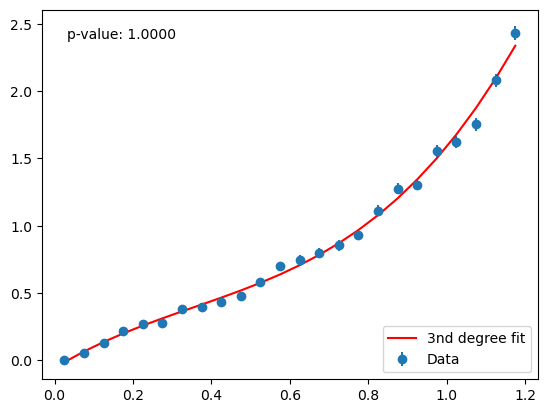

<Figure size 640x480 with 0 Axes>

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load the data
data = pd.read_csv("./08_homework.dat", delim_whitespace=True, header=None)
x = data[0].to_numpy()
y = data[1].to_numpy()
dy = data[2].to_numpy()

# Fit a 2nd degree polynomial to the data
degree = 3
coeffs = np.polyfit(x, y, degree)
y_fit = np.polyval(coeffs, x)
print(len(y_fit))
print(y_fit)
print(len(y))
print(y)
# Fit the data to a 2nd order polynomial

# Calculate the residuals
residuals = y - y_fit

# Calculate the degrees of freedom
n = degree
df = len(x) - n

# Calculate the chi-square statistic
chi2 = np.sum(((residuals / y.std()) ** 2) / dy)

# Calculate the p-value
p_value = 1 - stats.chi2.cdf(chi2, df)

print("p-value:", p_value)
# Plot the data and the fitted polynomial
plt.errorbar(x, y, yerr=dy, fmt="o", label="Data")  # Add error bars to the plot
plt.plot(x, y_fit, color="red", label="{}nd degree fit".format(degree))
plt.text(
    0.05,
    0.95,
    f"p-value: {p_value:.4f}",
    transform=plt.gca().transAxes,
    ha="left",
    va="top",
)
plt.legend(loc="lower right")
plt.show()
plt.savefig("plot.pdf", format="pdf")